In [8]:
# code to compute per parcel score(health) of an area 
import numpy as np

def calculate_final_score_single(req_value, ideal_range, weights):
    # Function to calculate percentage difference
    def calculate_percentage_difference(ideal_range, received_value):
        if isinstance(ideal_range, tuple):
            ideal_midpoint = (ideal_range[0] + ideal_range[1]) / 2
            return abs((ideal_midpoint - received_value) / ideal_midpoint) * 100
        else:
            return abs((ideal_range - received_value) / ideal_range) * 100

    # Calculate percentage difference for each metric
    percentage_diff = calculate_percentage_difference(ideal_range, req_value)

    # Normalize percentage differences
    normalized_score = (100 - percentage_diff) / 100

    # Calculate the weighted score
    weighted_score = normalized_score * weights
    
    return weighted_score

def process_matrix_request(req, crop_type):
    # Define weights and metrics based on crop type
    if crop_type == 'wheat':
        weights = {
            "NDVI": 0.3,
            "LAI": 0.3,
            "FAPAR": 0.2,
            "Canopy Temperature": 0.2
        }
        crop_metrics = {
            "April": {
                "NDVI": (0.2, 0.4),
                "LAI": (0.1, 0.3),
                "FAPAR": (0.1, 0.3),
                "Canopy Temperature": (10, 15)  # Celsius
            },
            "May": {
                "NDVI": (0.3, 0.5),
                "LAI": (0.2, 0.4),
                "FAPAR": (0.2, 0.4),
                "Canopy Temperature": (15, 20)  # Celsius
            },
            "June": {
                "NDVI": (0.5, 0.7),
                "LAI": (0.4, 0.8),
                "FAPAR": (0.4, 0.6),
                "Canopy Temperature": (20, 25)  # Celsius
            },
            "July": {
                "NDVI": (0.6, 0.8),
                "LAI": (0.6, 1.2),
                "FAPAR": (0.5, 0.7),
                "Canopy Temperature": (25, 30)  # Celsius
            },
            "August": {
                "NDVI": (0.5, 0.7),
                "LAI": (0.5, 1.0),
                "FAPAR": (0.4, 0.6),
                "Canopy Temperature": (20, 25)  # Celsius
            },
            "September": {
                "NDVI": (0.4, 0.6),
                "LAI": (0.4, 0.8),
                "FAPAR": (0.3, 0.5),
                "Canopy Temperature": (15, 20)  # Celsius
            }
        }
    elif crop_type == 'corn':
        weights = {
            "NDVI": 0.4,
            "LAI": 0.3,
            "FAPAR": 0.2,
            "Canopy Temperature": 0.1
        }
        crop_metrics = {
            "April": {
                "NDVI": (0.2, 0.4),
                "LAI": (0.1, 0.3),
                "FAPAR": (0.1, 0.3),
                "Canopy Temperature": (15, 20)
            },
            "May": {
                "NDVI": (0.2, 0.4),
                "LAI": (0.2, 0.4),
                "FAPAR": (0.2, 0.4),
                "Canopy Temperature": (15, 20)
            },
            "June": {
                "NDVI": (0.5, 0.7),
                "LAI": (0.5, 1.0),
                "FAPAR": (0.4, 0.6),
                "Canopy Temperature": (20, 25)
            },
            "July": {
                "NDVI": (0.7, 0.9),
                "LAI": (1.0, 2.0),
                "FAPAR": (0.6, 0.8),
                "Canopy Temperature": (25, 30)
            },
            "August": {
                "NDVI": (0.7, 0.9),
                "LAI": (1.0, 2.0),
                "FAPAR": (0.6, 0.8),
                "Canopy Temperature": (25, 30)
            },
            "September": {
                "NDVI": (0.5, 0.7),
                "LAI": (0.5, 1.0),
                "FAPAR": (0.4, 0.6),
                "Canopy Temperature": (20, 25)
            },
            "October": {
                "NDVI": (0.5, 0.7),
                "LAI": (0.2, 0.5),
                "FAPAR": (0.3, 0.5),
                "Canopy Temperature": (15, 20)
            }
        }
    else:
        return "Error: Unsupported crop type."

    # Check if the month is valid
    if req['month'] not in crop_metrics:
        return np.zeros_like(req['NDVI'])  # Return a matrix of zeros if month is invalid

    ideal_metrics = crop_metrics[req['month']]
    ndvi_matrix = req['NDVI']
    lai_matrix = req['LAI']
    fapar_matrix = req['FAPAR']
    canopy_temp_matrix = req['Canopy Temperature']

    # Initialize an empty matrix for scores
    score_matrix = np.zeros_like(ndvi_matrix)

    # Calculate scores for each point in the matrix
    for i in range(ndvi_matrix.shape[0]):
        for j in range(ndvi_matrix.shape[1]):
            ndvi_score = calculate_final_score_single(ndvi_matrix[i, j], ideal_metrics['NDVI'], weights['NDVI'])
            lai_score = calculate_final_score_single(lai_matrix[i, j], ideal_metrics['LAI'], weights['LAI'])
            fapar_score = calculate_final_score_single(fapar_matrix[i, j], ideal_metrics['FAPAR'], weights['FAPAR'])
            canopy_temp_score = calculate_final_score_single(canopy_temp_matrix[i, j], ideal_metrics['Canopy Temperature'], weights['Canopy Temperature'])
            
            # Aggregate scores
            total_score = ndvi_score + lai_score + fapar_score + canopy_temp_score
            score_matrix[i, j] = round(total_score, 3)

    return score_matrix

# Example of request with data from copernicus
req = {
    'month': 'August',
    'NDVI': np.random.uniform(0.3, 1, (500, 500)), # matrix
    'LAI': np.random.uniform(0.2, 1.0, (500, 500)), # matrix
    'FAPAR': np.random.uniform(0.2, 0.7, (500, 500)), # matrix
    'Canopy Temperature': np.random.uniform(10, 35, (500, 500)) # matrix
}

# Our results, matrix structured
# wheat_scores = process_matrix_request(req, 'wheat')
corn_scores = process_matrix_request(req, 'corn')

# print("Wheat Scores Matrix:")
# print(wheat_scores)

print("Corn Scores Matrix:")
print(corn_scores)


Corn Scores Matrix:
[[0.635 0.661 0.573 ... 0.722 0.638 0.462]
 [0.654 0.603 0.563 ... 0.594 0.644 0.61 ]
 [0.722 0.492 0.557 ... 0.74  0.498 0.576]
 ...
 [0.732 0.546 0.603 ... 0.803 0.63  0.672]
 [0.642 0.6   0.727 ... 0.778 0.487 0.533]
 [0.62  0.494 0.543 ... 0.47  0.664 0.643]]


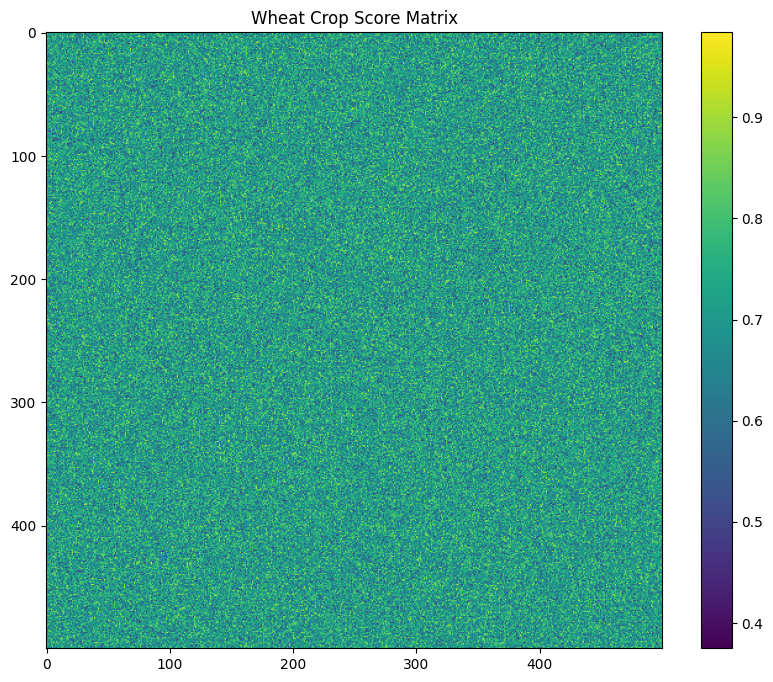

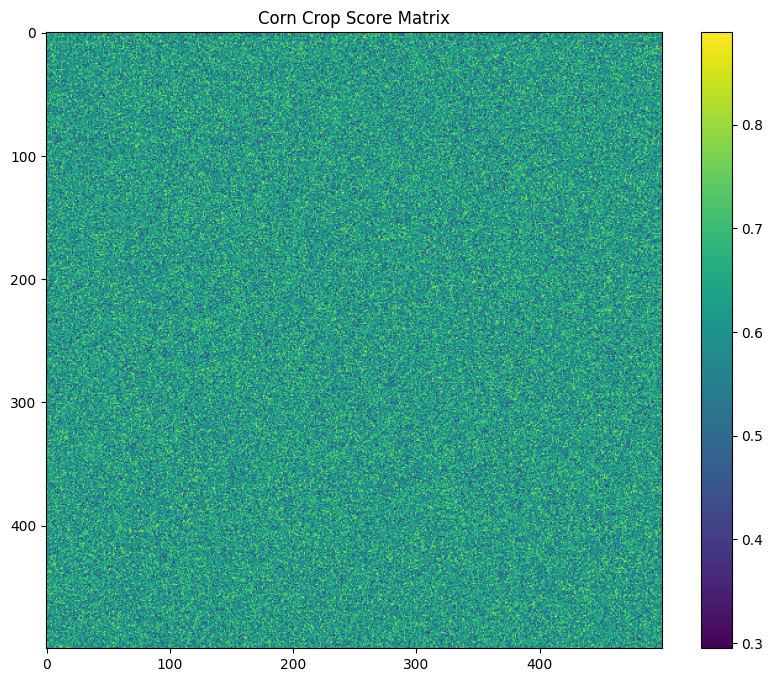

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.show()


plot_heatmap(wheat_scores, "Wheat Crop Score Matrix")
plot_heatmap(corn_scores, "Corn Crop Score Matrix")